# Context
Music therapy, or MT, is the use of music to improve an individual's stress, mood, and overall mental health. MT is also recognized as an evidence-based practice, using music as a catalyst for "happy" hormones such as oxytocin.

However, MT employs a wide range of different genres, varying from one organization to the next.

The MxMH dataset aims to identify what, if any, correlations exist between an individual's music taste and their self-reported mental health. Ideally, these findings could contribute to a more informed application of MT or simply provide interesting sights about the mind.

https://www.kaggle.com/datasets/catherinerasgaitis/mxmh-survey-results


# Data collection
Data collection was managed by @catherinerasgaitis via a Google Form. Respondents were not restricted by age or location.

The form was posted in various Reddit forums, Discord servers, and social media platforms. Posters and "business cards" were also used to advertise the form in libraries, parks, and other public locations.

The form was relatively brief so that respondents would be more likely finish the survey. "Harder" questions (such as BPM) were left optional for the same reason.

EDA notebook coming soon!

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#load the dataset
MxMH_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Music and Mental Health/mxmh_survey_results.csv',encoding="ISO-8859-1")

In [ ]:
# set the for show max columns
pd.set_option('display.max_columns', None)

In [ ]:
MxMH_df.head()

Timestamp   Age Primary streaming service  Hours per day  \
0  8/27/2022 19:29:02  18.0                   Spotify            3.0   
1  8/27/2022 19:57:31  63.0                   Pandora            1.5   
2  8/27/2022 21:28:18  18.0                   Spotify            4.0   
3  8/27/2022 21:40:40  61.0             YouTube Music            2.5   
4  8/27/2022 21:54:47  18.0                   Spotify            4.0   

  While working Instrumentalist Composer         Fav genre Exploratory  \
0           Yes             Yes      Yes             Latin         Yes   
1           Yes              No       No              Rock         Yes   
2            No              No       No  Video game music          No   
3           Yes              No      Yes              Jazz         Yes   
4           Yes              No       No               R&B         Yes   

  Foreign languages    BPM Frequency [Classical] Frequency [Country]  \
0               Yes  156.0                Rarely               Never   
1                No  119.0             Sometimes               Never   
2               Yes  132.0                 Never               Never   
3               Yes   84.0             Sometimes               Never   
4                No  107.0                 Never               Never   

   Frequency [EDM] Frequency [Folk] Frequency [Gospel] Frequency [Hip hop]  \
0           Rarely            Never              Never           Sometimes   
1            Never           Rarely          Sometimes              Rarely   
2  Very frequently            Never              Never              Rarely   
3            Never           Rarely          Sometimes               Never   
4           Rarely            Never             Rarely     Very frequently   

  Frequency [Jazz] Frequency [K pop] Frequency [Latin] Frequency [Lofi]  \
0            Never   Very frequently   Very frequently           Rarely   
1  Very frequently            Rarely         Sometimes           Rarely   
2           Rarely   Very frequently             Never        Sometimes   
3  Very frequently         Sometimes   Very frequently        Sometimes   
4            Never   Very frequently         Sometimes        Sometimes   

  Frequency [Metal]  Frequency [Pop]  Frequency [R&B]  Frequency [Rap]  \
0             Never  Very frequently        Sometimes  Very frequently   
1             Never        Sometimes        Sometimes           Rarely   
2         Sometimes           Rarely            Never           Rarely   
3             Never        Sometimes        Sometimes            Never   
4             Never        Sometimes  Very frequently  Very frequently   

  Frequency [Rock] Frequency [Video game music]  Anxiety  Depression  \
0            Never                    Sometimes      3.0         0.0   
1  Very frequently                       Rarely      7.0         2.0   
2           Rarely              Very frequently      7.0         7.0   
3            Never                        Never      9.0         7.0   
4            Never                       Rarely      7.0         2.0   

   Insomnia  OCD Music effects    Permissions  
0       1.0  0.0           NaN  I understand.  
1       2.0  1.0           NaN  I understand.  
2      10.0  2.0     No effect  I understand.  
3       3.0  3.0       Improve  I understand.  
4       5.0  9.0       Improve  I understand.

In [ ]:
MxMH_df.shape

(736, 33)

# Dropping Umwanted Columns

In [ ]:
MxMH_df=MxMH_df.drop(['Timestamp','Permissions'], axis=1)

In [ ]:
MxMH_df.shape

(736, 31)

# Handling Outliers

In [ ]:
MxMH_df.describe() 

Age  Hours per day           BPM     Anxiety  Depression  \
count  735.000000     736.000000  6.290000e+02  736.000000  736.000000   
mean    25.206803       3.572758  1.589948e+06    5.837636    4.796196   
std     12.054970       3.028199  3.987261e+07    2.793054    3.028870   
min     10.000000       0.000000  0.000000e+00    0.000000    0.000000   
25%     18.000000       2.000000  1.000000e+02    4.000000    2.000000   
50%     21.000000       3.000000  1.200000e+02    6.000000    5.000000   
75%     28.000000       5.000000  1.440000e+02    8.000000    7.000000   
max     89.000000      24.000000  1.000000e+09   10.000000   10.000000   

         Insomnia         OCD  
count  736.000000  736.000000  
mean     3.738451    2.637228  
std      3.088689    2.842017  
min      0.000000    0.000000  
25%      1.000000    0.000000  
50%      3.000000    2.000000  
75%      6.000000    5.000000  
max     10.000000   10.000000

## Kolom BPM

In [ ]:
#baiknya dibikin function emang
def checkingoutliers(d):
  mean = d.mean()
  std = d.std()
  kiri = mean - 3*std
  kanan = mean + 3*std
  
  return mean, std, kiri, kanan

In [ ]:
meanBPM, stdBPM, kiri, kanan = checkingoutliers(MxMH_df.BPM)

print(meanBPM)
print(stdBPM)
MxMH_df [MxMH_df.BPM < kiri]
MxMH_df [MxMH_df.BPM > kanan]

1589948.344992051
39872606.18037188


Age Primary streaming service  Hours per day While working  \
568  16.0                   Spotify            7.0           Yes   

    Instrumentalist Composer         Fav genre Exploratory Foreign languages  \
568              No       No  Video game music         Yes                No   

             BPM Frequency [Classical] Frequency [Country] Frequency [EDM]  \
568  999999999.0                 Never              Rarely       Sometimes   

    Frequency [Folk] Frequency [Gospel] Frequency [Hip hop] Frequency [Jazz]  \
568           Rarely              Never              Rarely           Rarely   

    Frequency [K pop] Frequency [Latin] Frequency [Lofi] Frequency [Metal]  \
568             Never             Never            Never   Very frequently   

    Frequency [Pop] Frequency [R&B]  Frequency [Rap] Frequency [Rock]  \
568       Sometimes           Never  Very frequently           Rarely   

    Frequency [Video game music]  Anxiety  Depression  Insomnia  OCD  \
568                    Sometimes      4.0         8.0       8.0  4.0   

    Music effects  
568     No effect

In [ ]:
MxMH_df.drop([568], inplace=True)

<ipython-input-14-2487f455ffd2>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(MxMH_df['BPM'], kde=True)


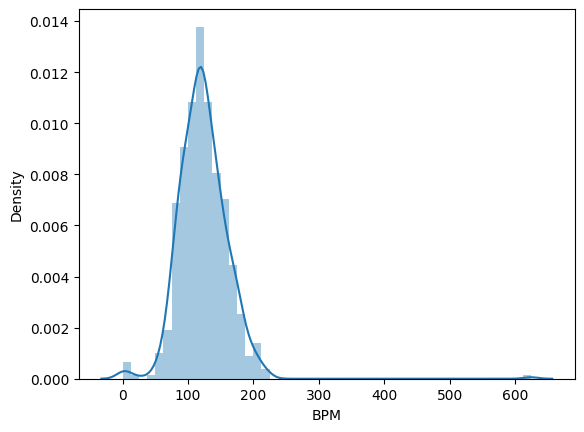

In [ ]:
sns.distplot(MxMH_df['BPM'], kde=True)
plt.show()

In [ ]:
meanBPM, stdBPM, kiri, kanan = checkingoutliers(MxMH_df.BPM)
print(meanBPM)
print(stdBPM)
MxMH_df [MxMH_df.BPM < kiri]
MxMH_df [MxMH_df.BPM > kanan]

123.42356687898089
39.34530670645314


Age Primary streaming service  Hours per day While working  \
644  16.0   Other streaming service            4.0           Yes   

    Instrumentalist Composer Fav genre Exploratory Foreign languages    BPM  \
644              No       No       EDM         Yes               Yes  624.0   

    Frequency [Classical] Frequency [Country]  Frequency [EDM]  \
644             Sometimes               Never  Very frequently   

    Frequency [Folk] Frequency [Gospel] Frequency [Hip hop] Frequency [Jazz]  \
644            Never              Never               Never            Never   

    Frequency [K pop] Frequency [Latin] Frequency [Lofi] Frequency [Metal]  \
644            Rarely             Never            Never             Never   

    Frequency [Pop] Frequency [R&B] Frequency [Rap] Frequency [Rock]  \
644           Never           Never           Never            Never   

    Frequency [Video game music]  Anxiety  Depression  Insomnia  OCD  \
644                    Sometimes      4.0         7.0       1.0  3.0   

    Music effects  
644       Improve

In [ ]:
MxMH_df.drop([644], inplace=True)

<ipython-input-18-2487f455ffd2>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(MxMH_df['BPM'], kde=True)


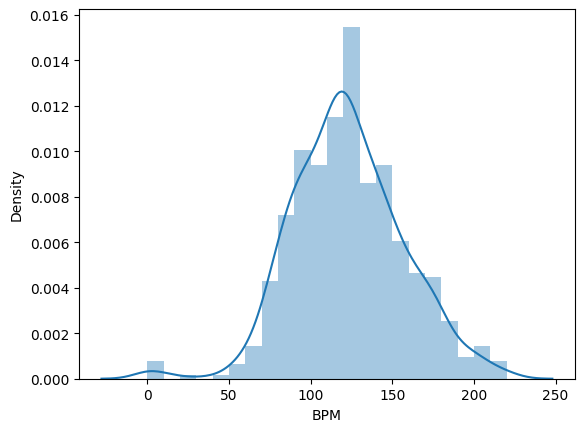

In [ ]:
sns.distplot(MxMH_df['BPM'], kde=True)
plt.show()

In [ ]:
meanBPM, stdBPM, kiri, kanan = checkingoutliers(MxMH_df.BPM)
print(meanBPM)
print(stdBPM)
MxMH_df [MxMH_df.BPM < kiri]
MxMH_df [MxMH_df.BPM > kanan]

122.62519936204147
33.90582997759789


Empty DataFrame
Columns: [Age, Primary streaming service, Hours per day, While working, Instrumentalist, Composer, Fav genre, Exploratory, Foreign languages, BPM, Frequency [Classical], Frequency [Country], Frequency [EDM], Frequency [Folk], Frequency [Gospel], Frequency [Hip hop], Frequency [Jazz], Frequency [K pop], Frequency [Latin], Frequency [Lofi], Frequency [Metal], Frequency [Pop], Frequency [R&B], Frequency [Rap], Frequency [Rock], Frequency [Video game music], Anxiety, Depression, Insomnia, OCD, Music effects]
Index: []

## Kolom Hours Per Day

In [ ]:
meanHPD, stdHPD, kiri, kanan = checkingoutliers(MxMH_df['Hours per day'])
print(meanHPD)
print(stdHPD)
MxMH_df [MxMH_df['Hours per day'] < kiri]
MxMH_df [MxMH_df['Hours per day'] > kanan]

3.567506811989101
3.0296381662004035


Age Primary streaming service  Hours per day While working  \
18   17.0                   Spotify           24.0           Yes   
290  27.0                   Spotify           20.0           Yes   
347  18.0                   Spotify           16.0           Yes   
359  16.0                   Spotify           15.0           Yes   
366  16.0                   Spotify           24.0           Yes   
407  26.0                   Spotify           14.0           Yes   
426  30.0                   Spotify           13.0           NaN   
485  55.0             YouTube Music           15.0           Yes   
695  89.0                   Spotify           24.0           Yes   
726  18.0               Apple Music           18.0           Yes   

    Instrumentalist Composer Fav genre Exploratory Foreign languages    BPM  \
18               No       No       Rap         Yes                No   99.0   
290              No       No      Rock         Yes               Yes    NaN   
347              No      Yes      Jazz         Yes               Yes   90.0   
359             Yes      Yes       EDM         Yes                No   85.0   
366              No       No      Rock         Yes               Yes  120.0   
407              No       No   Hip hop         Yes               Yes  158.0   
426              No       No     K pop         Yes               Yes  145.0   
485              No       No      Rock          No                No  156.0   
695             Yes      Yes       Rap          No                No  143.0   
726              No       No       EDM         Yes                No   90.0   

    Frequency [Classical] Frequency [Country]  Frequency [EDM]  \
18                 Rarely               Never            Never   
290             Sometimes              Rarely        Sometimes   
347             Sometimes           Sometimes        Sometimes   
359                Rarely               Never  Very frequently   
366                 Never               Never           Rarely   
407             Sometimes           Sometimes           Rarely   
426             Sometimes               Never           Rarely   
485                Rarely               Never            Never   
695                 Never               Never           Rarely   
726             Sometimes              Rarely  Very frequently   

    Frequency [Folk] Frequency [Gospel] Frequency [Hip hop] Frequency [Jazz]  \
18             Never              Never           Sometimes        Sometimes   
290           Rarely              Never              Rarely            Never   
347        Sometimes          Sometimes     Very frequently  Very frequently   
359            Never              Never              Rarely           Rarely   
366            Never              Never               Never            Never   
407  Very frequently              Never     Very frequently  Very frequently   
426        Sometimes              Never           Sometimes        Sometimes   
485  Very frequently              Never               Never        Sometimes   
695           Rarely              Never     Very frequently        Sometimes   
726            Never             Rarely           Sometimes        Sometimes   

    Frequency [K pop] Frequency [Latin] Frequency [Lofi] Frequency [Metal]  \
18          Sometimes            Rarely            Never         Sometimes   
290         Sometimes            Rarely        Sometimes   Very frequently   
347   Very frequently   Very frequently  Very frequently   Very frequently   
359             Never             Never           Rarely         Sometimes   
366            Rarely            Rarely           Rarely            Rarely   
407            Rarely            Rarely  Very frequently            Rarely   
426   Very frequently   Very frequently           Rarely            Rarely   
485             Never            Rarely            Never             Never   
695             Never             Never           Rarely            Rarely   

# Handling Missing Value

In [ ]:
missing_values = MxMH_df.isnull().sum()
missing_values

Age                               1
Primary streaming service         1
Hours per day                     0
While working                     3
Instrumentalist                   4
Composer                          1
Fav genre                         0
Exploratory                       0
Foreign languages                 4
BPM                             107
Frequency [Classical]             0
Frequency [Country]               0
Frequency [EDM]                   0
Frequency [Folk]                  0
Frequency [Gospel]                0
Frequency [Hip hop]               0
Frequency [Jazz]                  0
Frequency [K pop]                 0
Frequency [Latin]                 0
Frequency [Lofi]                  0
Frequency [Metal]                 0
Frequency [Pop]                   0
Frequency [R&B]                   0
Frequency [Rap]                   0
Frequency [Rock]                  0
Frequency [Video game music]      0
Anxiety                           0
Depression                  

## Handling Missing Value pada kolom Age

In [ ]:
MxMH_df[MxMH_df['Age'].isnull()]

Age Primary streaming service  Hours per day While working  \
12  NaN                   Spotify            3.0           Yes   

   Instrumentalist Composer Fav genre Exploratory Foreign languages  BPM  \
12              No       No   Hip hop         Yes               Yes  NaN   

   Frequency [Classical] Frequency [Country] Frequency [EDM] Frequency [Folk]  \
12                Rarely               Never          Rarely            Never   

   Frequency [Gospel] Frequency [Hip hop] Frequency [Jazz] Frequency [K pop]  \
12              Never     Very frequently            Never         Sometimes   

   Frequency [Latin] Frequency [Lofi] Frequency [Metal] Frequency [Pop]  \
12             Never  Very frequently             Never       Sometimes   

   Frequency [R&B] Frequency [Rap] Frequency [Rock]  \
12       Sometimes          Rarely           Rarely   

   Frequency [Video game music]  Anxiety  Depression  Insomnia  OCD  \
12                        Never      9.0         3.0       2.0  7.0   

   Music effects  
12       Improve

<ipython-input-25-89a8991ef735>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(MxMH_df['Age'], kde=True)


<Axes: xlabel='Age', ylabel='Density'>

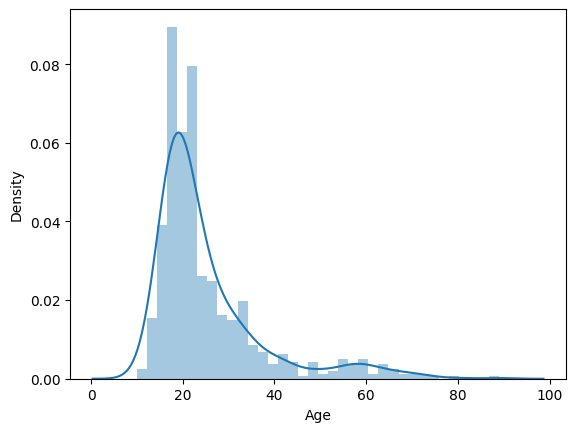

In [ ]:
sns.distplot(MxMH_df['Age'], kde=True)

In [ ]:
# filling null values in 'Age' with respective median age
MxMH_df['Age'].fillna(MxMH_df['Age'].median(), inplace=True)

In [ ]:
MxMH_df[MxMH_df['Age'].isnull()]

Empty DataFrame
Columns: [Age, Primary streaming service, Hours per day, While working, Instrumentalist, Composer, Fav genre, Exploratory, Foreign languages, BPM, Frequency [Classical], Frequency [Country], Frequency [EDM], Frequency [Folk], Frequency [Gospel], Frequency [Hip hop], Frequency [Jazz], Frequency [K pop], Frequency [Latin], Frequency [Lofi], Frequency [Metal], Frequency [Pop], Frequency [R&B], Frequency [Rap], Frequency [Rock], Frequency [Video game music], Anxiety, Depression, Insomnia, OCD, Music effects]
Index: []

## Handling Missing Value pada kolom BPM

In [ ]:
MxMH_df[MxMH_df['BPM'].isnull()]

Age          Primary streaming service  Hours per day While working  \
10   18.0                            Spotify            3.0           Yes   
12   21.0                            Spotify            3.0           Yes   
15   17.0                            Spotify            2.0            No   
30   20.0                        Apple Music            5.0           Yes   
32   19.0                            Spotify            6.0           Yes   
..    ...                                ...            ...           ...   
688  18.0                            Spotify            4.0           Yes   
700  20.0                      YouTube Music            1.0           Yes   
706  23.0                            Spotify            1.0           Yes   
712  23.0  I do not use a streaming service.            3.0           Yes   
717  23.0                            Spotify            2.0            No   

    Instrumentalist Composer Fav genre Exploratory Foreign languages  BPM  \
10              Yes       No   Country         Yes                No  NaN   
12               No       No   Hip hop         Yes               Yes  NaN   
15               No       No       Pop         Yes               Yes  NaN   
30              Yes       No      Rock         Yes               Yes  NaN   
32              Yes       No     Metal         Yes               Yes  NaN   
..              ...      ...       ...         ...               ...  ...   
688              No       No       R&B          No                No  NaN   
700              No       No       Pop          No               Yes  NaN   
706             Yes       No      Rock         Yes               Yes  NaN   
712              No       No      Rock          No                No  NaN   
717              No       No      Rock         Yes               Yes  NaN   

    Frequency [Classical] Frequency [Country] Frequency [EDM]  \
10                  Never     Very frequently           Never   
12                 Rarely               Never          Rarely   
15                 Rarely              Rarely           Never   
30                  Never              Rarely          Rarely   
32                  Never               Never           Never   
..                    ...                 ...             ...   
688                 Never              Rarely           Never   
700             Sometimes              Rarely          Rarely   
706                Rarely              Rarely       Sometimes   
712                 Never               Never           Never   
717                Rarely               Never          Rarely   

    Frequency [Folk] Frequency [Gospel] Frequency [Hip hop] Frequency [Jazz]  \
10             Never              Never               Never            Never   
12             Never              Never     Very frequently            Never   
15             Never              Never           Sometimes           Rarely   
30   Very frequently              Never     Very frequently        Sometimes   
32            Rarely              Never              Rarely        Sometimes   
..               ...                ...                 ...              ...   
688            Never              Never     Very frequently            Never   
700           Rarely             Rarely           Sometimes           Rarely   
706        Sometimes              Never           Sometimes           Rarely   
712           Rarely              Never               Never        Sometimes   
717           Rarely              Never           Sometimes            Never   

    Frequency [K pop] Frequency [Latin] Frequency [Lofi] Frequency [Metal]  \
10              Never             Never            Never             Never   
12          Sometimes             Never  Very frequently             Never   
15             Rarely            Rarely           Rarely            Rarely   
30              Never         Sometimes        Sometimes   Very frequently   
32             Rarely   

In [ ]:
# filling null values in 'BPM' with Mean
MxMH_df.BPM.fillna(meanBPM, inplace=True)

In [ ]:
MxMH_df[MxMH_df['BPM'].isnull()]

Empty DataFrame
Columns: [Age, Primary streaming service, Hours per day, While working, Instrumentalist, Composer, Fav genre, Exploratory, Foreign languages, BPM, Frequency [Classical], Frequency [Country], Frequency [EDM], Frequency [Folk], Frequency [Gospel], Frequency [Hip hop], Frequency [Jazz], Frequency [K pop], Frequency [Latin], Frequency [Lofi], Frequency [Metal], Frequency [Pop], Frequency [R&B], Frequency [Rap], Frequency [Rock], Frequency [Video game music], Anxiety, Depression, Insomnia, OCD, Music effects]
Index: []

## Handling Missing Value pada kolom-kolom Categorical

In [ ]:
MxMH_df[(MxMH_df['Primary streaming service'].isnull()) | (MxMH_df['While working'].isnull()) | (MxMH_df['Composer'].isnull()) | (MxMH_df['Foreign languages'].isnull())]

Age          Primary streaming service  Hours per day While working  \
57   42.0  I do not use a streaming service.            0.0           NaN   
197  21.0                                NaN            5.0           Yes   
235  31.0                            Spotify            2.0            No   
396  14.0                      YouTube Music            1.5            No   
426  30.0                            Spotify           13.0           NaN   
561  21.0                            Spotify            1.0           NaN   
666  15.0                            Spotify            3.0           Yes   

    Instrumentalist Composer  Fav genre Exploratory Foreign languages  \
57               No       No       Rock          No               Yes   
197              No       No    Country         Yes                No   
235             Yes       No      Metal         Yes               NaN   
396             Yes       No  Classical         Yes               NaN   
426              No       No      K pop         Yes               Yes   
561             NaN      NaN      K pop         Yes               NaN   
666             Yes       No       Rock          No               NaN   

            BPM Frequency [Classical] Frequency [Country] Frequency [EDM]  \
57   122.625199                Rarely              Rarely           Never   
197   85.000000                 Never     Very frequently          Rarely   
235   95.000000             Sometimes           Sometimes       Sometimes   
396  140.000000       Very frequently               Never           Never   
426  145.000000             Sometimes               Never          Rarely   
561  122.625199                Rarely              Rarely       Sometimes   
666  132.000000             Sometimes               Never           Never   

    Frequency [Folk] Frequency [Gospel] Frequency [Hip hop] Frequency [Jazz]  \
57             Never              Never               Never           Rarely   
197        Sometimes              Never              Rarely            Never   
235           Rarely              Never              Rarely            Never   
396            Never             Rarely               Never        Sometimes   
426        Sometimes              Never           Sometimes        Sometimes   
561           Rarely              Never     Very frequently           Rarely   
666            Never              Never               Never            Never   

    Frequency [K pop] Frequency [Latin] Frequency [Lofi] Frequency [Metal]  \
57              Never             Never            Never         Sometimes   
197             Never             Never            Never         Sometimes   
235             Never             Never           Rarely   Very frequently   
396             Never             Never            Never             Never   
426   Very frequently   Very frequently           Rarely            Rarely   
561   Very frequently            Rarely           Rarely         Sometimes   
666             Never             Never           Rarely   Very frequently   

     Frequency [Pop]  Frequency [R&B] Frequency [Rap] Frequency [Rock]  \
57            Rarely           Rarely           Never        Sometimes   
197        Sometimes            Never          Rarely  Very frequently   
235  Very frequently           Rarely       Sometimes  Very frequently   
396            Never            Never           Never           Rarely   
426  Very frequently  Very frequently       Sometimes  Very frequently   
561  Very frequently        Sometimes       Sometimes  Very frequently   
666            Never            Never           Never  Very frequently   

    Frequency [Video game music]  Anxiety  Depression  Insomnia  OCD  \
57                     Sometimes      9.0         0.0      10.0  0.0   
197                        Never      9.0         8.0       9.0  7.0   
235                    Sometimes      7.0         6.0       6.0  5.0   
396                    Sometimes      1.

In [ ]:
#Handling missing value by mode imputation
byMode = ['Primary streaming service', 'While working', 'Instrumentalist', 'Composer', 'Foreign languages']

def mode(A, df):
  for a in A:
    # Calculate the mode of column A
    mode_A = df[a].mode()[0]

    # Replace missing values with the mode of column A
    df[a].fillna(mode_A, inplace=True)

mode(byMode, MxMH_df)

In [ ]:
MxMH_df[(MxMH_df['Primary streaming service'].isnull()) | (MxMH_df['While working'].isnull()) | (MxMH_df['Composer'].isnull()) | (MxMH_df['Foreign languages'].isnull())]

Empty DataFrame
Columns: [Age, Primary streaming service, Hours per day, While working, Instrumentalist, Composer, Fav genre, Exploratory, Foreign languages, BPM, Frequency [Classical], Frequency [Country], Frequency [EDM], Frequency [Folk], Frequency [Gospel], Frequency [Hip hop], Frequency [Jazz], Frequency [K pop], Frequency [Latin], Frequency [Lofi], Frequency [Metal], Frequency [Pop], Frequency [R&B], Frequency [Rap], Frequency [Rock], Frequency [Video game music], Anxiety, Depression, Insomnia, OCD, Music effects]
Index: []

## Handling Missing Value pada kolom Music Effect

In [ ]:
MxMH_df[(MxMH_df['Music effects'].isnull())]

Age          Primary streaming service  Hours per day While working  \
0    18.0                            Spotify            3.0           Yes   
1    63.0                            Pandora            1.5           Yes   
161  18.0            Other streaming service            2.0           Yes   
168  19.0                            Spotify            3.0           Yes   
338  21.0                      YouTube Music            2.0           Yes   
441  21.0                        Apple Music            1.5           Yes   
532  67.0  I do not use a streaming service.            1.0            No   
561  21.0                            Spotify            1.0           NaN   

    Instrumentalist Composer Fav genre Exploratory Foreign languages  \
0               Yes      Yes     Latin         Yes               Yes   
1                No       No      Rock         Yes                No   
161              No       No     K pop          No               Yes   
168             Yes       No     K pop         Yes               Yes   
338              No       No       EDM          No               Yes   
441             Yes       No      Folk          No                No   
532              No       No      Rock          No                No   
561             NaN      NaN     K pop         Yes               NaN   

            BPM Frequency [Classical] Frequency [Country]  Frequency [EDM]  \
0    156.000000                Rarely               Never           Rarely   
1    119.000000             Sometimes               Never            Never   
161  122.000000                Rarely               Never            Never   
168  114.000000             Sometimes               Never            Never   
338  122.625199                Rarely              Rarely  Very frequently   
441  105.000000                 Never           Sometimes            Never   
532  122.625199             Sometimes           Sometimes            Never   
561  122.625199                Rarely              Rarely        Sometimes   

    Frequency [Folk] Frequency [Gospel] Frequency [Hip hop] Frequency [Jazz]  \
0              Never              Never           Sometimes            Never   
1             Rarely          Sometimes              Rarely  Very frequently   
161            Never              Never               Never            Never   
168  Very frequently             Rarely              Rarely           Rarely   
338           Rarely             Rarely              Rarely            Never   
441  Very frequently              Never               Never            Never   
532        Sometimes          Sometimes           Sometimes        Sometimes   
561           Rarely              Never     Very frequently           Rarely   

    Frequency [K pop] Frequency [Latin] Frequency [Lofi] Frequency [Metal]  \
0     Very frequently   Very frequently           Rarely             Never   
1              Rarely         Sometimes           Rarely             Never   
161   Very frequently             Never           Rarely             Never   
168   Very frequently             Never        Sometimes             Never   
338             Never             Never        Sometimes            Rarely   
441             Never             Never            Never             Never   
532             Never         Sometimes            Never         Sometimes   
561   Very frequently            Rarely           Rarely         Sometimes   

     Frequency [Pop] Frequency [R&B]  Frequency [Rap] Frequency [Rock]  \
0    Very frequently       Sometimes  Very frequently            Never   
1          Sometimes       Sometimes           Rarely  Very frequently   
161  Very frequently       Sometimes            Never            Never   
168        Sometimes       Sometimes           Rarely        Sometimes   
338        Sometimes          Rarely           Rarely        Sometimes   
441            Never           Never            Never        Sometimes   
532        Sometim

In [ ]:
# Drop records where column 'Music effects' has a null value
MxMH_df.dropna(subset=['Music effects'], inplace=True)

In [ ]:
MxMH_df[(MxMH_df['Music effects'].isnull())]

Empty DataFrame
Columns: [Age, Primary streaming service, Hours per day, While working, Instrumentalist, Composer, Fav genre, Exploratory, Foreign languages, BPM, Frequency [Classical], Frequency [Country], Frequency [EDM], Frequency [Folk], Frequency [Gospel], Frequency [Hip hop], Frequency [Jazz], Frequency [K pop], Frequency [Latin], Frequency [Lofi], Frequency [Metal], Frequency [Pop], Frequency [R&B], Frequency [Rap], Frequency [Rock], Frequency [Video game music], Anxiety, Depression, Insomnia, OCD, Music effects]
Index: []

# Check for duplicate records

In [ ]:
# Check for duplicate records
duplicate_records = MxMH_df.duplicated()

if duplicate_records.any():
    print("There are duplicates in this dataframe.")
else:
    print("There is no duplicate in this dataframe.")


There is no duplicate in this dataframe.


In [ ]:
# Menyimpan DataFrame menjadi file Excel
MxMH_df.to_excel('/content/drive/MyDrive/Colab Notebooks/Music and Mental Health/clean MxMH dataframe.xlsx', index=False)

In [ ]:
#install this package first
!pip install pandas-profiling

import pandas_profiling

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 20.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 352.3/352.3 kB 31.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 11.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 50.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 29.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 455.4/455.4 kB 38.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 77.1 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=07dd09b84aedc0a6b434ca022eec12883c47a0128178902fd7c2c5be4bfd89b9
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin
  Attemp

<ipython-input-39-d7e3fad717f3>:3: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  import pandas_profiling


In [ ]:
pandas_profiling.ProfileReport(MxMH_df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]